In [18]:
import pandas as pd

df = pd.read_csv('/content/tcc_ceds_music.csv')

df.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


# 1. Data Exploration and Understanding (5%):
• Thorough exploration of the dataset.
• Clear understanding of data characteristics.

In [19]:
# Initial exploration has been done above, providing an overview of the dataset's structure and basic statistics.

# Further data exploration focusing on:
# 1. Distribution of genres
genre_distribution = df['genre'].value_counts()

# 2. Overview of release years
release_years_distribution = df['release_date'].value_counts().sort_index()

# 3. Check for missing values
missing_values = df.isnull().sum()

# 4. Overview of numeric features distribution
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features_distribution = numeric_features.describe()

genre_distribution, release_years_distribution, missing_values, numeric_features_distribution.head()


(genre
 pop        7042
 country    5445
 blues      4604
 rock       4034
 jazz       3845
 reggae     2498
 hip hop     904
 Name: count, dtype: int64,
 release_date
 1950     51
 1951     58
 1952     60
 1953     48
 1954    109
        ... 
 2015    617
 2016    533
 2017    660
 2018    653
 2019    534
 Name: count, Length: 70, dtype: int64,
 Unnamed: 0                  0
 artist_name                 0
 track_name                  0
 release_date                0
 genre                       0
 lyrics                      0
 len                         0
 dating                      0
 violence                    0
 world/life                  0
 night/time                  0
 shake the audience          0
 family/gospel               0
 romantic                    0
 communication               0
 obscene                     0
 music                       0
 movement/places             0
 light/visual perceptions    0
 family/spiritual            0
 like/girls                  

# 2. Data Preprocessing

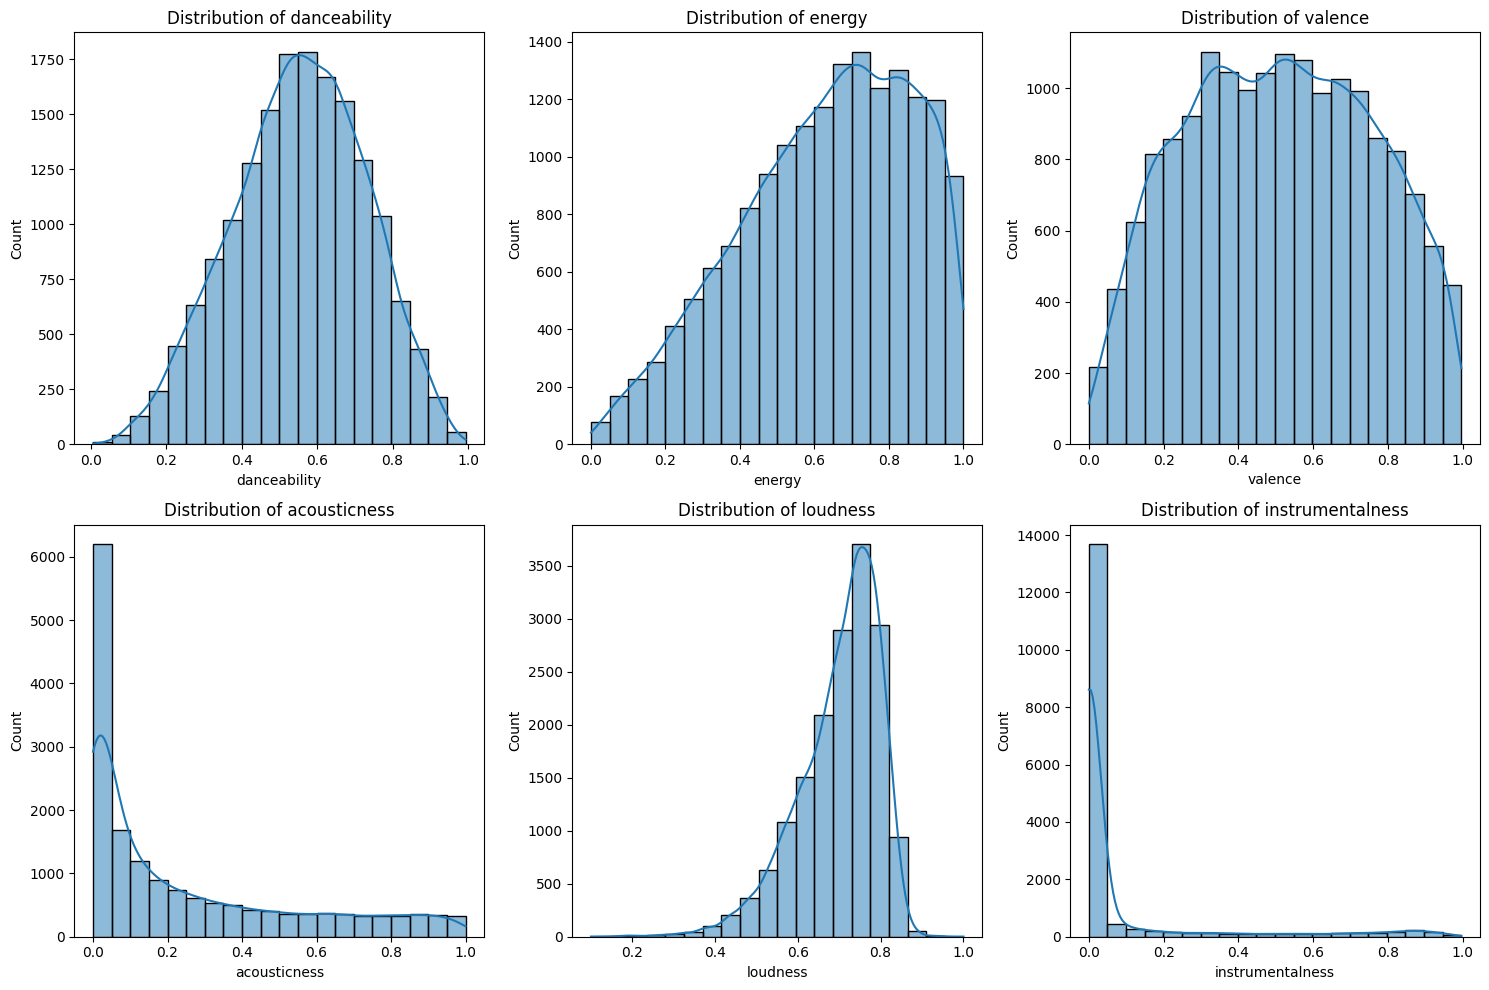

Unnamed: 0                     0
release_date                   0
len                          306
dating                      3783
violence                     211
world/life                   946
night/time                  1759
shake the audience          2454
family/gospel               3846
romantic                    2438
communication                610
obscene                     1711
music                       2278
movement/places             2069
light/visual perceptions    1871
family/spiritual            2198
like/girls                  2326
sadness                      640
feelings                    1781
danceability                  10
loudness                     363
acousticness                   0
instrumentalness            3526
valence                        0
energy                         0
age                            0
dtype: int64


In [20]:
# Data Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Set cutoff year for filtering the dataset based on release year
cutoff_year = 1985
df_filtered = df[df['release_date'] > cutoff_year]

# Checking for outliers in numerical features within the filtered dataset
numeric_features_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_features_filtered.quantile(0.25)
Q3 = numeric_features_filtered.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers as those beyond 1.5 times the IQR from the Q1 and Q3 in the filtered dataset
outliers_filtered = ((numeric_features_filtered < (Q1 - 1.5 * IQR)) | (numeric_features_filtered > (Q3 + 1.5 * IQR))).sum()

# For exploratory data analysis (EDA), focusing on the distribution of numeric features in the filtered dataset
# Selecting a subset of interesting numeric features for visualization
features_to_plot = ['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'instrumentalness']
df_subset_filtered = df_filtered[features_to_plot]

# Plotting histograms for selected features in the filtered dataset
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_subset_filtered[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Displaying outliers in the filtered dataset
print(outliers_filtered)


# Clustering

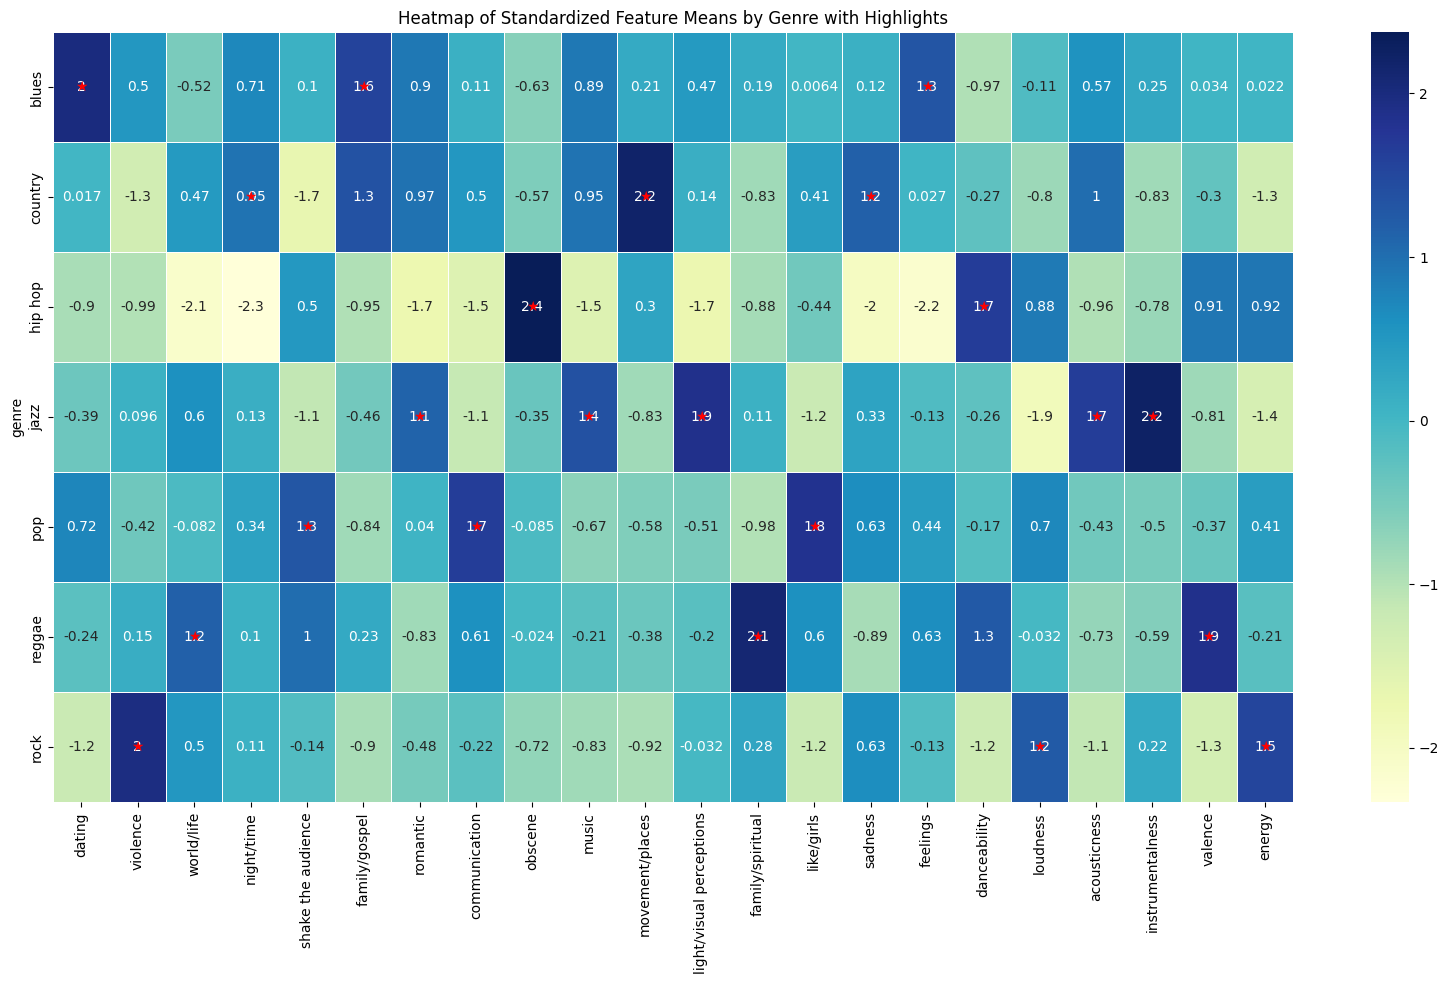

In [21]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting Relevant Features for Clustering
features_for_clustering = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls',
    'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
    'instrumentalness', 'valence', 'energy'
]

# Calculating the mean of each feature within each genre
genre_feature_means = df_filtered.groupby('genre')[features_for_clustering].mean()

# Standardizing the Data for better visualization
scaler = StandardScaler()
genre_feature_means_scaled = scaler.fit_transform(genre_feature_means)
genre_feature_means_scaled_df = pd.DataFrame(genre_feature_means_scaled, columns=features_for_clustering, index=genre_feature_means.index)

# Finding the genre with the highest mean value for each feature
max_feature_values = genre_feature_means_scaled_df.idxmax()

# Highlighting these max values in the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed to fit all features
sns.heatmap(genre_feature_means_scaled_df, cmap="YlGnBu", annot=True, linewidths=.5)

# Add markers for the highest value in each column
for feature, genre in max_feature_values.items():
    # Getting the indices for plotting
    genre_idx = list(genre_feature_means_scaled_df.index).index(genre)
    feature_idx = list(genre_feature_means_scaled_df.columns).index(feature)
    # Plot the marker
    plt.text(feature_idx + 0.5, genre_idx + 0.5, '★', ha='center', va='center', color='red')

# Adjust the x-ticks to fit all feature names
plt.xticks(rotation=90)  # Rotate the labels to make them readable
plt.title('Heatmap of Standardized Feature Means by Genre with Highlights')
plt.show()


- sending to excel file
- Uploading excel file with predictions to power BI to start making the dashboard

# Suggesting Genres and Songs based on features and genres



1. Personality Selection: The process starts with identifying the user's personality type (e.g., 'Neuroticism').

2. Genre Affinity: Based on the personality type, the algorithm selects genres that are generally preferred by people with that personality.

3. Feature Weighting: Within those selected genres, it evaluates and weights specific musical features that are associated with the personality type.

4. Song Filtering: It then filters songs that belong to the selected genres.

5. Song Scoring: For these filtered songs, it calculates a composite score based on the weighted features.

6. Song Selection: Finally, it selects the top-scoring songs as recommendations.

In [22]:
import pandas as pd

# Assuming 'genre_feature_means_scaled_df' is your DataFrame from previous steps

# Mapping of personalities to their preferred genres and features

'''
You can now change the features below, you can edit the rank of them. So if you change the order of the features, it readjusts in hte output
'''

personality_genre_map = {
    'Extraversion': {
        'genres': ['hip hop', 'pop'],
        'features': ['danceability', 'energy', 'dating','night/time']
    },
    'Agreeableness': {
        'genres': ['country', 'pop', 'reggae'],
        'features': ['valence', 'dating','family/gospel','like/girls']
    },
    'Conscientiousness': {
        'genres': ['country','rock'],
        'features': ['instrumentalness', 'family/gospel','movement/places','feelings']
    },
    'Neuroticism': {
        'genres': ['jazz', 'rock'],
        'features': ['valence', 'sadness', 'romantic','loudness']  # Considering low loudness, but we need to handle this inversely
    },
    'Openness': {
        'genres': ['blues', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'],
        'features': ['acousticness','romantic','communication','energy']
    }
}

def suggest_genre(user_personality):
    # Initialize a dictionary to hold scores for each genre
    genre_scores = {genre: 0 for genre in personality_genre_map[user_personality]['genres']}

    if user_personality in personality_genre_map:
        preferred_genres = personality_genre_map[user_personality]['genres']
        preferred_features = personality_genre_map[user_personality]['features']  # Get preferred features
        feature_priority = {feature: index for index, feature in enumerate(preferred_features)}  # Assign priority based on order

        for genre in preferred_genres:
            if genre in genre_feature_means_scaled_df.index:  # Check if the genre is present in the data
                for feature in preferred_features:
                    # Update scores for the specified genre based on the preferred features
                    if user_personality == 'Neuroticism' and feature == 'loudness':
                        genre_scores[genre] -= abs(genre_feature_means_scaled_df.loc[genre, feature])  # Inverse handling
                    else:
                        genre_scores[genre] += genre_feature_means_scaled_df.loc[genre, feature] * (len(preferred_features) - feature_priority[feature])  # Weighted scoring

        # Calculate total score
        total_score = sum(genre_scores.values())

        # Normalize prediction percentages to a 100 percent scale
        prediction_percentage = {genre: (score / total_score) * 100 for genre, score in genre_scores.items()}

        return prediction_percentage
    else:
        print(f"Invalid personality type '{user_personality}'. Please provide a valid personality type.")
        return {}


def suggest_songs_based_on_personality(df, user_personality, personality_genre_map, prediction_percentage, top_n=10):
    """
    Suggest songs based on the genres and features relevant to the user's personality type,
    considering the prediction percentages for genre relevance.

    :param df: DataFrame containing the songs data.
    :param user_personality: The user's personality type.
    :param personality_genre_map: Mapping of personality types to their preferred genres and features.
    :param prediction_percentage: Prediction percentages for genres from suggest_genre function.
    :param top_n: Number of top songs to return.
    :return: A DataFrame containing the top N suggested songs.
    """
    if user_personality not in personality_genre_map or not prediction_percentage:
        print(f"Invalid personality type '{user_personality}' or no genre predictions available.")
        return pd.DataFrame()  # Return an empty DataFrame for invalid personality types or missing predictions

    # Extract relevant genres based on prediction percentages (assuming higher percentages mean more relevance)
    relevant_genres = [genre for genre in prediction_percentage]

    # Filter songs by selected genres
    df_filtered = df[df['genre'].str.lower().isin([g.lower() for g in relevant_genres])]

    features = personality_genre_map[user_personality]['features']
    # Normalize the features within the filtered DataFrame and calculate a composite score
    for feature in features:
        df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())

    norm_features = [f + '_norm' for f in features]
    df_filtered['composite_score'] = df_filtered[norm_features].mean(axis=1)

    # Sort by the composite score in descending order to get the top songs
    top_songs = df_filtered.sort_values(by='composite_score', ascending=False).head(top_n)

    return top_songs[['artist_name', 'track_name', 'genre'] + features + ['composite_score']]


##########################################

#Edit the personality here
user_personality = 'Neuroticism'  # User input for personality type

##########################################

# # Now, 'suggest_genre' only considers the genres associated with the given personality type
# prediction_percentage = suggest_genre(user_personality)
# if prediction_percentage:
#     print(f"Prediction percentages for genres associated with {user_personality}:")
#     for genre, percentage in prediction_percentage.items():
#         print(f"{genre}: {percentage:.2f}%")
# else:
#     print(f"No genres associated with {user_personality} in the dictionary map.")



# # Example usage
# prediction_percentage = suggest_genre(user_personality)  # Ensure this function returns a dictionary of genre: percentage
# if prediction_percentage:
#     suggested_songs = suggest_songs_based_on_personality(df_filtered, user_personality, personality_genre_map, prediction_percentage, 10)
#     print(suggested_songs)
# else:
#     print("No song suggestions available based on the selected personality.")
prediction_percentage = suggest_genre(user_personality)
if prediction_percentage:
    suggested_songs = suggest_songs_based_on_personality(df_filtered, user_personality, personality_genre_map, prediction_percentage, 10)
    if not suggested_songs.empty:
        suggested_songs.to_excel("suggested_songs.xlsx", index=False)
        print("Suggested songs have been saved to 'suggested_songs.xlsx'.")
    else:
        print("No song suggestions available based on the selected personality.")
else:
    print(f"No genres associated with {user_personality} in the dictionary map.")

Suggested songs have been saved to 'suggested_songs.xlsx'.


<ipython-input-22-a6e02057c588>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())
<ipython-input-22-a6e02057c588>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())
<ipython-input-22-a6e02057c588>:89: SettingWithCopyWarning

## Suggesting songs based on the above personality to genre analysis

In [23]:
## Next step is to output this into BI which will allow us to create graghs with different ranking of features. Etc. Since the above features
## can be changed in terms of order to change the output

